<h3 style="text-align:center;">ESCUELA POLITÉCNICA NACIONAL</h3>
<h3 style="text-align:center;">FACULTAD DE INGENIERÍA EN SISTEMAS</h3>
<h3 style="text-align:center;">METODOS NUMERICOS ICCD412 </h3>
<h3 style="text-align:center;">Taller 04 Splines Cúbicos</h3>

* JUAN FRANCISCO PINTO ANDRANGO 

* LUIS ALEXANDER LEMA DELGADO 

* GR1CC

* FECHA DE ENTREGA 24 DE NOVIEMBRE DEL 2025

### *Complete el codigo del siguiente repositorio* 

https://github.com/ztjona/splines

In [ ]:
#codigo proporcionado por el docente 

import sympy as sym
from IPython.display import display


# ###################################################################
def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    # alpha = # completar
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z  # = completar

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a  # = completar
        print(j, a, b, c[j], d)
        S  # = completar

        splines.append(S)
    splines.reverse()
    return splines

In [5]:
#codigo completado 

# el algoritmo realiza el ordenaminto con las cordenadas "x", calcula las distancias "h"
# calcula alpha , y resuelve el sistema tridiagonal con el algoritmo de Thomas
# con el algoritmo de thomas calcula los coeficientes c, b, d y a de cada polinomio cubico
# construye los splines para cada intervalo y los devuelve en una lista 

import sympy as sym
from IPython.display import display

# ###################################################################
def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``
    
    xs must be different but not necessarily ordered nor equally spaced.
    
    ## Parameters
    - xs, ys: points to be interpolated
    
    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """
    
    points = sorted(zip(xs, ys), key=lambda x: x[0])  
    
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    
    n = len(points) - 1  
    
    h = [xs[i + 1] - xs[i] for i in range(n)]  
    
    # inicializamos una lista alpha con n+1 elementos en 0 
    alpha = [0] * (n + 1)
    
    # creamos la inicializacion de alpha para que en la compilacion no de error  
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])
    
    l = [1]
    u = [0]
    z = [0]
    
    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        # calculamos z con el algoritmo de Thomas completado 
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]
    
    l.append(1)
    z.append(0)
    c = [0] * (n + 1)
    
    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        # Asignamos un coeficiente a del polinomio cubico
        a = ys[j]
        print(j, a, b, c[j], d)
        # Definimos el polinomio cubico con Sympy 
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j])**2 + d * (x - xs[j])**3
        
        splines.append(S)
    splines.reverse()
    return splines


# Ejemplo de uso
xs = [0, 1, 2]
ys = [-5, -4, 3]

splines = cubic_spline(xs=xs, ys=ys)
print("Splines en forma simbólica:")
_ = [display(s) for s in splines]
print("______")
print("Splines expandidos:")
_ = [display(s.expand()) for s in splines]

1 -4 4.0 4.5 -1.5
0 -5 -0.5 0.0 1.5
Splines en forma simbólica:


1.5*x**3 - 0.5*x - 5

4.0*x - 1.5*(x - 1)**3 + 4.5*(x - 1)**2 - 8.0

______
Splines expandidos:


1.5*x**3 - 0.5*x - 5

-1.5*x**3 + 9.0*x**2 - 9.5*x - 2.0

####  *compruebe graficamente la solucion de los siguientes ejercicios:*

*$1. (0,1),(1,5),(2,3)$*

*$2.(0,-5),(1,-4),(2,3)$*

*$3.(0,-1),(1,1),(2,5),(3,2)$*

In [6]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

def cubic_spline_clamped(xs, ys, B0=0, B1=0):
    
    # ordenamiento de puntos 
    points = sorted(zip(xs, ys), key=lambda x: x[0])
    xs = np.array([p[0] for p in points], dtype=float)
    ys = np.array([p[1] for p in points], dtype=float)
    
    n = len(xs) - 1
    h = xs[1:] - xs[:-1]

    # calculamos alpha
    alpha = np.zeros(n + 1)
    alpha[0] = (3 / h[0]) * (ys[1] - ys[0]) - 3 * B0
    alpha[-1] = 3 * B1 - (3 / h[-1]) * (ys[-1] - ys[-2])

    for i in range(1, n):
        alpha[i] = (3 / h[i]) * (ys[i + 1] - ys[i]) - (3 / h[i - 1]) * (ys[i] - ys[i - 1])

    # resolvemos el sistema tridiagonal con Thomas
    l = np.zeros(n + 1)
    u = np.zeros(n + 1)
    z = np.zeros(n + 1)

    l[0] = 2 * h[0]
    u[0] = 0.5
    z[0] = alpha[0] / l[0]

    for i in range(1, n):
        l[i] = 2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]
        u[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    l[n] = h[n - 1] * (2 - u[n - 1])
    z[n] = (alpha[n] - h[n - 1] * z[n - 1]) / l[n]

    # calculamos los coeficientes
    c = np.zeros(n + 1)
    c[n] = z[n]

    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]

    # construimos los splines
    x_sym = sym.Symbol("x")
    splines = []

    for j in range(n):
        a = ys[j]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        S = a + b*(x_sym - xs[j]) + c[j]*(x_sym - xs[j])**2 + d*(x_sym - xs[j])**3
        splines.append((sym.simplify(S), (xs[j], xs[j + 1])))

    # graficar los splines
    plt.figure(figsize=(10, 5))
    
    for S, (xi, xf) in splines:
        f = sym.lambdify(x_sym, S, "numpy")
        x_vals = np.linspace(xi, xf, 200)
        plt.plot(x_vals, f(x_vals), label=f"${sym.simplify(S)}$")

    # graficar puntos
    plt.plot(xs, ys, "o", color="black", label="datos")

    plt.title("spline cubico con condiciones de borde (B0 = 0, B1 = 0)")
    plt.xlabel("x")
    plt.ylabel("S(x)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return [S for S, _ in splines]


Spline cubico para las cordenadas (0,1),(1,5),(2,3)


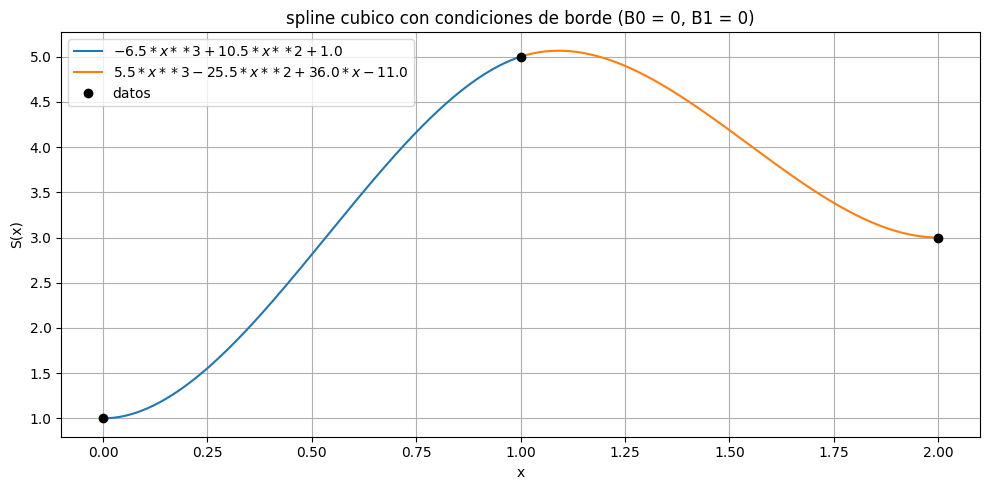

[-6.5*x**3 + 10.5*x**2 + 1.0, 5.5*x**3 - 25.5*x**2 + 36.0*x - 11.0]

In [7]:
xs = [0, 1, 2]
ys = [1, 5, 3]

print("Spline cubico para las cordenadas (0,1),(1,5),(2,3)")
splines = cubic_spline_clamped(xs, ys)
splines


Spline cubico para las cordenadas (0,-5),(1,-4),(2,3)


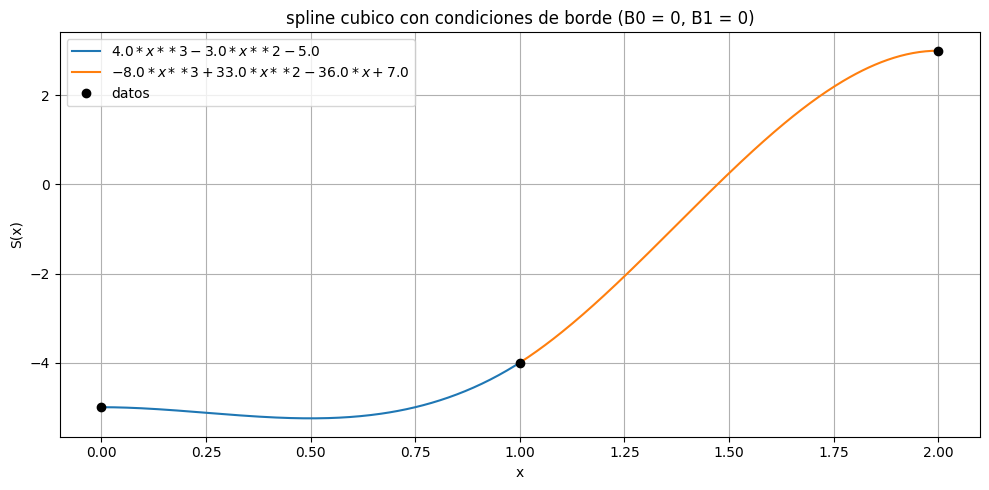

[4.0*x**3 - 3.0*x**2 - 5.0, -8.0*x**3 + 33.0*x**2 - 36.0*x + 7.0]

In [19]:
xs = [0, 1, 2]
ys = [-5, -4, 3]

print("Spline cubico para las cordenadas (0,-5),(1,-4),(2,3)")
splines = cubic_spline_clamped(xs, ys)
splines


Spline cubico para (0,-1),(1,1),(2,5),(3,2)


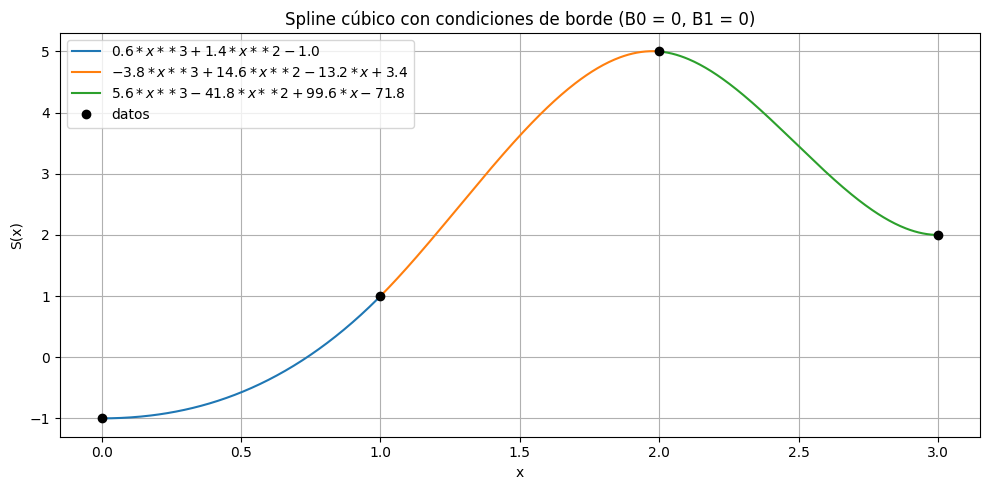

[0.6*x**3 + 1.4*x**2 - 1.0,
 -3.8*x**3 + 14.6*x**2 - 13.2*x + 3.4,
 5.6*x**3 - 41.8*x**2 + 99.6*x - 71.8]

In [8]:
xs = [0, 1, 2, 3]
ys = [-1, 1, 5, 2]

print("Spline cubico para (0,-1),(1,1),(2,5),(3,2)")
splines = cubic_spline_clamped(xs, ys)
splines


-*Para cada uno de los ejercicios anteriores, resuelva los splines cúbicos de frontera condicionada con $B_0=1$ para todos los valores de $B_1 \in\mathbb{R}$*



In [ ]:
# Gráfica interactiva con control de B_1
from ipywidgets import interact, FloatSlider
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

def plot_interactive_spline(xs, ys, B0=0):
    """
    Crea una gráfica interactiva del spline cúbico con control deslizante para B_1
    
    Parámetros:
    xs: puntos x
    ys: puntos y
    B0: condición de borde inicial (fija)
    """
    
    def update_plot(B1):
        # ordenamiento de puntos 
        points = sorted(zip(xs, ys), key=lambda x: x[0])
        xs_sorted = np.array([p[0] for p in points], dtype=float)
        ys_sorted = np.array([p[1] for p in points], dtype=float)
        
        n = len(xs_sorted) - 1
        h = xs_sorted[1:] - xs_sorted[:-1]

        # calculamos alpha
        alpha = np.zeros(n + 1)
        alpha[0] = (3 / h[0]) * (ys_sorted[1] - ys_sorted[0]) - 3 * B0
        alpha[-1] = 3 * B1 - (3 / h[-1]) * (ys_sorted[-1] - ys_sorted[-2])

        for i in range(1, n):
            alpha[i] = (3 / h[i]) * (ys_sorted[i + 1] - ys_sorted[i]) - (3 / h[i - 1]) * (ys_sorted[i] - ys_sorted[i - 1])

        # resolvemos el sistema tridiagonal con Thomas
        l = np.zeros(n + 1)
        u = np.zeros(n + 1)
        z = np.zeros(n + 1)

        l[0] = 2 * h[0]
        u[0] = 0.5
        z[0] = alpha[0] / l[0]

        for i in range(1, n):
            l[i] = 2 * (xs_sorted[i + 1] - xs_sorted[i - 1]) - h[i - 1] * u[i - 1]
            u[i] = h[i] / l[i]
            z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

        l[n] = h[n - 1] * (2 - u[n - 1])
        z[n] = (alpha[n] - h[n - 1] * z[n - 1]) / l[n]

        # calculamos los coeficientes
        c = np.zeros(n + 1)
        c[n] = z[n]

        for j in range(n - 1, -1, -1):
            c[j] = z[j] - u[j] * c[j + 1]

        # construimos los splines
        x_sym = sym.Symbol("x")
        splines = []

        for j in range(n):
            a = ys_sorted[j]
            b = (ys_sorted[j + 1] - ys_sorted[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
            d = (c[j + 1] - c[j]) / (3 * h[j])
            S = a + b*(x_sym - xs_sorted[j]) + c[j]*(x_sym - xs_sorted[j])**2 + d*(x_sym - xs_sorted[j])**3
            splines.append((S, (xs_sorted[j], xs_sorted[j + 1])))

        # graficar los splines
        plt.figure(figsize=(12, 6))
        
        for S, (xi, xf) in splines:
            f = sym.lambdify(x_sym, S, "numpy")
            x_vals = np.linspace(xi, xf, 200)
            plt.plot(x_vals, f(x_vals), 'b-', linewidth=2)

        # graficar puntos
        plt.plot(xs_sorted, ys_sorted, "o", color="red", markersize=8, label="Datos", zorder=5)
        
        # graficar la tangente en el último punto (usando B1)
        x_tang = np.linspace(xs_sorted[-1] - 0.5, xs_sorted[-1] + 0.5, 100)
        y_tang = ys_sorted[-1] + B1 * (x_tang - xs_sorted[-1])
        plt.plot(x_tang, y_tang, 'r--', linewidth=2, label=f'Tangente en x={xs_sorted[-1]:.2f} (pendiente B₁={B1:.2f})')
        
        # marcar el punto donde se dibuja la tangente
        plt.plot(xs_sorted[-1], ys_sorted[-1], 'go', markersize=10, label='Punto final', zorder=6)

        plt.title(f"Spline Cúbico Interactivo - B₀ = {B0:.2f}, B₁ = {B1:.2f}", fontsize=14)
        plt.xlabel("x", fontsize=12)
        plt.ylabel("S(x)", fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    # Crear widget interactivo
    interact(update_plot, 
             B1=FloatSlider(value=0, min=-5, max=5, step=0.1, 
                           description='B₁:', 
                           style={'description_width': 'initial'},
                           continuous_update=False))

#Ejemplo de uso:
xs = [0, 1, 2, 3]
ys = [1, 2, 1.5, 3]
plot_interactive_spline(xs, ys, B0=0)

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='B₁:', max=5.0, min=-5.0, st…

In [ ]:
# Ejemplo de uso:
# xs = [0, 1, 2, 3]
# ys = [1, 2, 1.5, 3]
# plot_interactive_spline(xs, ys, B0=0)